In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import gdown
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rio
import rasterstats
from pprint import pprint
import xarray as xr

import micro
import gtsa

import seaborn as sns 
import statsmodels.api as sm

## $\Delta$ Z eCDF plots
- Do not run plots without clearing all cell output first.

In [3]:
ds_diff_k13_wsyr1_sfm = xr.open_dataset('../data/k13_wsyr1_diff_sfm.nc').squeeze()
ds_diff_k13_dsyr1_sfm = xr.open_dataset('../data/k13_dsyr1_diff_sfm.nc').squeeze()
ds_diff_k13_wsyr2_sfm = xr.open_dataset('../data/k13_wsyr2_diff_sfm.nc').squeeze()

ds_diff_m14_wsyr1_sfm = xr.open_dataset('../data/m14_wsyr1_diff_sfm.nc').squeeze()
ds_diff_m14_dsyr1_sfm = xr.open_dataset('../data/m14_dsyr1_diff_sfm.nc').squeeze()
ds_diff_m14_wsyr2_sfm = xr.open_dataset('../data/m14_wsyr2_diff_sfm.nc').squeeze()

In [4]:
ds_diff_k13_wsyr1_sfm_2 = ds_diff_k13_wsyr1_sfm.isel(time=2).to_dataframe()
ds_diff_k13_wsyr1_sfm_2.reset_index(inplace=True)
ds_diff_k13_wsyr1_sfm_2.dropna(inplace=True)
ds_diff_k13_wsyr1_sfm_2.drop(axis=1, labels=['time','spatial_ref'], inplace=True)

ds_diff_k13_wsyr1_sfm_3 = ds_diff_k13_wsyr1_sfm.isel(time=3).to_dataframe()
ds_diff_k13_wsyr1_sfm_3.reset_index(inplace=True)
ds_diff_k13_wsyr1_sfm_3.dropna(inplace=True)
ds_diff_k13_wsyr1_sfm_3.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_wsyr1_sfm_4 = ds_diff_k13_wsyr1_sfm.isel(time=4).to_dataframe()
ds_diff_k13_wsyr1_sfm_4.reset_index(inplace=True)
ds_diff_k13_wsyr1_sfm_4.dropna(inplace=True)
ds_diff_k13_wsyr1_sfm_4.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

In [6]:
ds_diff_k13_dsyr1_sfm_2 = ds_diff_k13_dsyr1_sfm.isel(time=2).to_dataframe()
ds_diff_k13_dsyr1_sfm_2.reset_index(inplace=True)
ds_diff_k13_dsyr1_sfm_2.dropna(inplace=True)
ds_diff_k13_dsyr1_sfm_2.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_dsyr1_sfm_3 = ds_diff_k13_dsyr1_sfm.isel(time=3).to_dataframe()
ds_diff_k13_dsyr1_sfm_3.reset_index(inplace=True)
ds_diff_k13_dsyr1_sfm_3.dropna(inplace=True)
ds_diff_k13_dsyr1_sfm_3.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

In [10]:
ds_diff_k13_wsyr2_sfm_2 = ds_diff_k13_wsyr2_sfm.isel(time=2).to_dataframe()
ds_diff_k13_wsyr2_sfm_2.reset_index(inplace=True)
ds_diff_k13_wsyr2_sfm_2.dropna(inplace=True)
ds_diff_k13_wsyr2_sfm_2.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_wsyr2_sfm_3 = ds_diff_k13_wsyr2_sfm.isel(time=3).to_dataframe()
ds_diff_k13_wsyr2_sfm_3.reset_index(inplace=True)
ds_diff_k13_wsyr2_sfm_3.dropna(inplace=True)
ds_diff_k13_wsyr2_sfm_3.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_wsyr2_sfm_4 = ds_diff_k13_wsyr2_sfm.isel(time=4).to_dataframe()
ds_diff_k13_wsyr2_sfm_4.reset_index(inplace=True)
ds_diff_k13_wsyr2_sfm_4.dropna(inplace=True)
ds_diff_k13_wsyr2_sfm_4.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

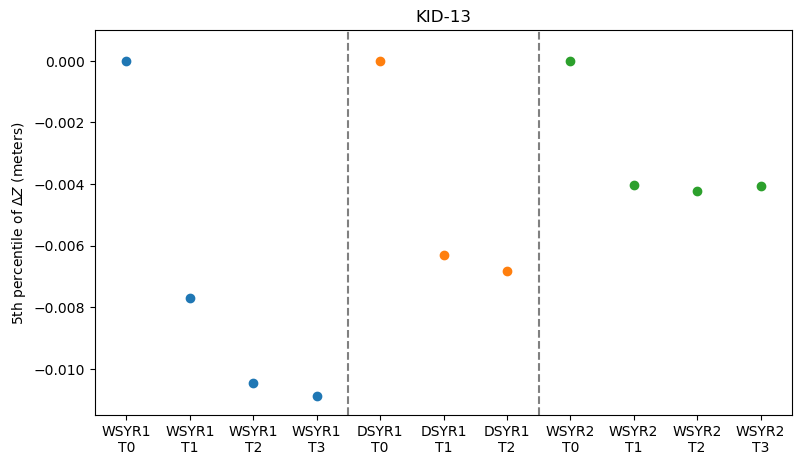

In [45]:
k13_wsyr1_5per_1 = np.percentile(ds_diff_k13_wsyr1_sfm_2,5)
k13_wsyr1_5per_2 = np.percentile(ds_diff_k13_wsyr1_sfm_3,5)
k13_wsyr1_5per_3 = np.percentile(ds_diff_k13_wsyr1_sfm_4,5)

k13_dsyr1_5per_1 = np.percentile(ds_diff_k13_dsyr1_sfm_2,5)
k13_dsyr1_5per_2 = np.percentile(ds_diff_k13_dsyr1_sfm_3,5)

k13_wsyr2_5per_1 = np.percentile(ds_diff_k13_wsyr2_sfm_2,5)
k13_wsyr2_5per_2 = np.percentile(ds_diff_k13_wsyr2_sfm_3,5)
k13_wsyr2_5per_3 = np.percentile(ds_diff_k13_wsyr2_sfm_4,5)

k13_5per1 = [0.0,k13_wsyr1_5per_1,k13_wsyr1_5per_2,k13_wsyr1_5per_3]
k13_5per2 = [0.0,k13_dsyr1_5per_1,k13_dsyr1_5per_2]
k13_5per3 = [0.0,k13_wsyr2_5per_1,k13_wsyr2_5per_2,k13_wsyr2_5per_3]

k13_time1 = ['WSYR1\nT0','WSYR1\nT1', 'WSYR1\nT2', 'WSYR1\nT3']
k13_time2 = ['DSYR1\nT0','DSYR1\nT1', 'DSYR1\nT2']
k13_time3 = ['WSYR2\nT0','WSYR2\nT1', 'WSYR2\nT2', 'WSYR2\nT3']


fig, ax = plt.subplots(figsize=(9,5))
plt.scatter(k13_time1, k13_5per1)
plt.scatter(k13_time2, k13_5per2)
plt.scatter(k13_time3, k13_5per3)
plt.axvline(x=3.5, color='gray', linestyle='--')
plt.axvline(x=6.5, color='gray', linestyle='--')
ax.set_ylim(-0.0115,0.001)

ax.set_ylabel(r'5th percentile of $\Delta Z$ (meters)')
ax.set_title('KID-13')
plt.show()

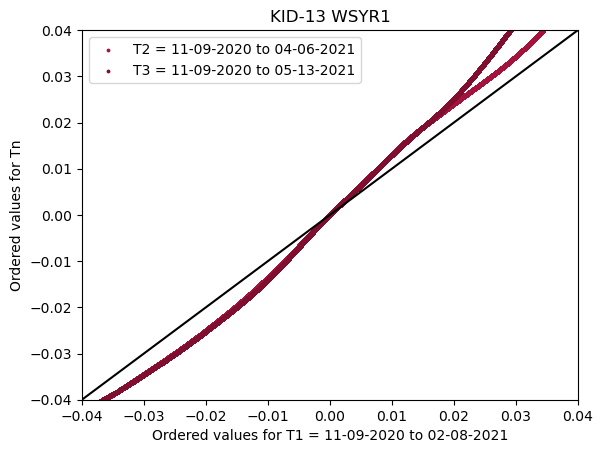

In [9]:
fig, ax = plt.subplots()

plt.scatter(ds_diff_k13_wsyr1_sfm_2.band1.sort_values(),ds_diff_k13_wsyr1_sfm_3.band1.sort_values(),
    s=3,color='#a4133c',label='T2 = 11-09-2020 to 04-06-2021')
plt.scatter(ds_diff_k13_wsyr1_sfm_2.band1.sort_values(),ds_diff_k13_wsyr1_sfm_4.band1.sort_values(),
    s=3,color='#800f2f',label='T3 = 11-09-2020 to 05-13-2021')
sm.qqline(ax,'45',color='k')
ax.set_xlabel('Ordered values for T1 = 11-09-2020 to 02-08-2021')
ax.set_ylabel('Ordered values for Tn')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(-0.04,0.04)
ax.legend()
ax.set_title('KID-13 WSYR1')

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.ecdfplot(ds_diff_k13_wsyr1_sfm_2, x='band1', stat='percent', ax=ax, color='#a4133c', label='11-09-2020 to 02-08-2021')
sns.ecdfplot(ds_diff_k13_wsyr1_sfm_3, x='band1', stat='percent', ax=ax, color='#800f2f', label='11-09-2020 to 04-06-2021')
sns.ecdfplot(ds_diff_k13_wsyr1_sfm_4, x='band1', stat='percent', ax=ax, color='#590d22', label='11-09-2020 to 05-13-2021')
ax.plot([0,0],[0,100], 'k--')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(0,100)
ax.set_xlabel(r'$\Delta$ Z (meters)')
ax.legend()
ax.set_title('KID-13 WSYR1')

plt.show()

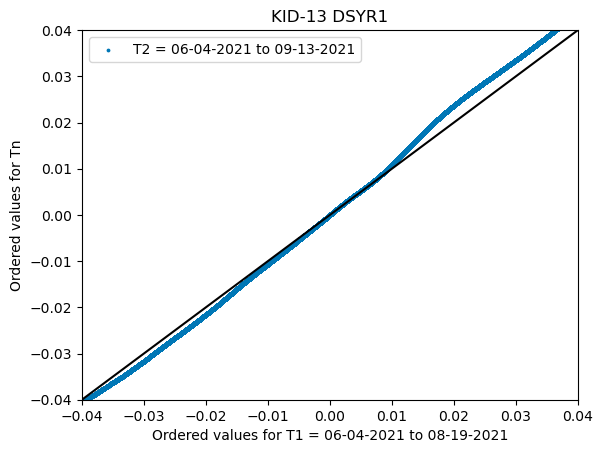

In [8]:
fig, ax = plt.subplots()

plt.scatter(ds_diff_k13_dsyr1_sfm_2.band1.sort_values(),
    ds_diff_k13_dsyr1_sfm_3.band1.sort_values(),s=3,color='#0077b6',
    label='T2 = 06-04-2021 to 09-13-2021')
sm.qqline(ax,'45',color='k')
ax.set_xlabel('Ordered values for T1 = 06-04-2021 to 08-19-2021')
ax.set_ylabel('Ordered values for Tn')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(-0.04,0.04)
ax.legend()
ax.set_title('KID-13 DSYR1')

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.ecdfplot(ds_diff_k13_dsyr1_sfm_2, x='band1', stat='percent', ax=ax, color='#0077b6', label='06-04-2021 to 08-19-2021')
sns.ecdfplot(ds_diff_k13_dsyr1_sfm_3, x='band1', stat='percent', ax=ax, color='#03045e', label='06-04-2021 to 09-13-2021')
ax.plot([0,0],[0,100], 'k--')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(0,100)
ax.set_xlabel(r'$\Delta$ Z (meters)')
ax.legend()
ax.set_title('KID-13 DSYR1')

plt.show()

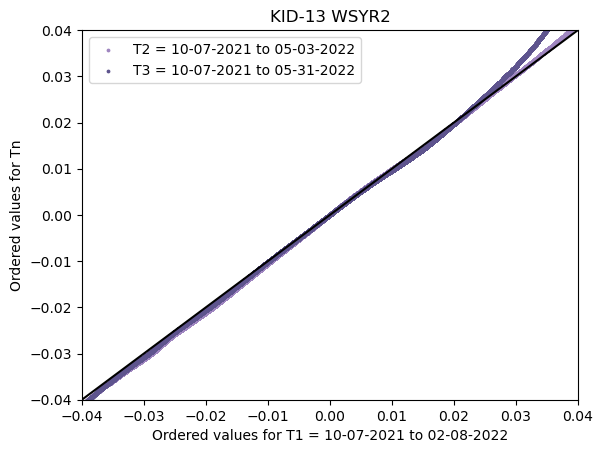

In [11]:
fig, ax = plt.subplots()

plt.scatter(ds_diff_k13_wsyr2_sfm_2.band1.sort_values(),
    ds_diff_k13_wsyr2_sfm_3.band1.sort_values(),s=3,color='#9f86c0',
    label='T2 = 10-07-2021 to 05-03-2022')
plt.scatter(ds_diff_k13_wsyr2_sfm_2.band1.sort_values(),
    ds_diff_k13_wsyr2_sfm_4.band1.sort_values(),s=3,color='#5e548e', 
    label='T3 = 10-07-2021 to 05-31-2022')
sm.qqline(ax, '45', color='k')
ax.set_xlabel('Ordered values for T1 = 10-07-2021 to 02-08-2022')
ax.set_ylabel('Ordered values for Tn')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(-0.04,0.04)
ax.legend()
ax.set_title('KID-13 WSYR2')

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.ecdfplot(ds_diff_k13_wsyr2_sfm_2, x='band1', stat='percent', ax=ax, color='#9f86c0', label='10-07-2021 to 02-08-2022')
sns.ecdfplot(ds_diff_k13_wsyr2_sfm_3, x='band1', stat='percent', ax=ax, color='#5e548e', label='10-07-2021 to 05-03-2022')
sns.ecdfplot(ds_diff_k13_wsyr2_sfm_4, x='band1', stat='percent', ax=ax, color='#231942', label='10-07-2021 to 05-31-2022')
ax.plot([0,0],[0,100], 'k--')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(0,100)
ax.set_xlabel(r'$\Delta$ Z (meters)')
ax.legend()
ax.set_title('KID-13 WSYR2')

plt.show()

In [47]:
ds_diff_m14_wsyr1_sfm_2 = ds_diff_m14_wsyr1_sfm.isel(time=2).to_dataframe()
ds_diff_m14_wsyr1_sfm_2.reset_index(inplace=True)
ds_diff_m14_wsyr1_sfm_2.dropna(inplace=True)
ds_diff_m14_wsyr1_sfm_2.drop(columns=['time','spatial_ref'], inplace=True)

In [48]:
ds_diff_m14_dsyr1_sfm_2 = ds_diff_m14_dsyr1_sfm.isel(time=2).to_dataframe()
ds_diff_m14_dsyr1_sfm_2.reset_index(inplace=True)
ds_diff_m14_dsyr1_sfm_2.dropna(inplace=True)
ds_diff_m14_dsyr1_sfm_2.drop(columns=['time','spatial_ref'], inplace=True)

In [49]:
ds_diff_m14_wsyr2_sfm_2 = ds_diff_m14_wsyr2_sfm.isel(time=2).to_dataframe()
ds_diff_m14_wsyr2_sfm_2.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_2.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_2.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_wsyr2_sfm_3 = ds_diff_m14_wsyr2_sfm.isel(time=3).to_dataframe()
ds_diff_m14_wsyr2_sfm_3.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_3.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_3.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_wsyr2_sfm_4 = ds_diff_m14_wsyr2_sfm.isel(time=4).to_dataframe()
ds_diff_m14_wsyr2_sfm_4.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_4.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_4.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_wsyr2_sfm_5 = ds_diff_m14_wsyr2_sfm.isel(time=5).to_dataframe()
ds_diff_m14_wsyr2_sfm_5.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_5.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_5.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_wsyr2_sfm_6 = ds_diff_m14_wsyr2_sfm.isel(time=6).to_dataframe()
ds_diff_m14_wsyr2_sfm_6.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_6.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_6.drop(columns=['time','spatial_ref'], inplace=True)

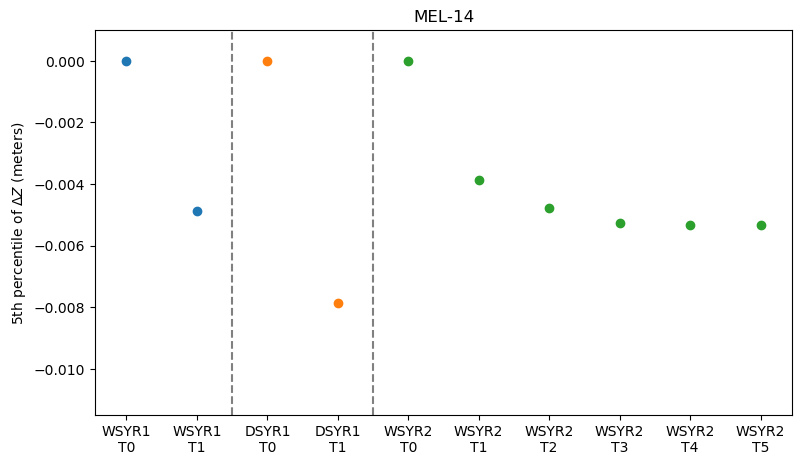

In [50]:
m14_wsyr1_5per_1 = np.percentile(ds_diff_m14_wsyr1_sfm_2,5)

m14_dsyr1_5per_1 = np.percentile(ds_diff_m14_dsyr1_sfm_2,5)

m14_wsyr2_5per_1 = np.percentile(ds_diff_m14_wsyr2_sfm_2,5)
m14_wsyr2_5per_2 = np.percentile(ds_diff_m14_wsyr2_sfm_3,5)
m14_wsyr2_5per_3 = np.percentile(ds_diff_m14_wsyr2_sfm_4,5)
m14_wsyr2_5per_4 = np.percentile(ds_diff_m14_wsyr2_sfm_5,5)
m14_wsyr2_5per_5 = np.percentile(ds_diff_m14_wsyr2_sfm_6,5)


m14_5per1 = [0.0,m14_wsyr1_5per_1]
m14_5per2 = [0.0,m14_dsyr1_5per_1]
m14_5per3 = [0.0,m14_wsyr2_5per_1,m14_wsyr2_5per_2,m14_wsyr2_5per_3,\
    m14_wsyr2_5per_4,m14_wsyr2_5per_5]

m14_time1 = ['WSYR1\nT0','WSYR1\nT1']
m14_time2 = ['DSYR1\nT0','DSYR1\nT1']
m14_time3 = ['WSYR2\nT0','WSYR2\nT1', 'WSYR2\nT2',\
    'WSYR2\nT3', 'WSYR2\nT4', 'WSYR2\nT5']


fig, ax = plt.subplots(figsize=(9,5))
plt.scatter(m14_time1, m14_5per1)
plt.scatter(m14_time2, m14_5per2)
plt.scatter(m14_time3, m14_5per3)
plt.axvline(x=1.5, color='gray', linestyle='--')
plt.axvline(x=3.5, color='gray', linestyle='--')
ax.set_ylim(-0.0115,0.001)

ax.set_ylabel(r'5th percentile of $\Delta Z$ (meters)')
ax.set_title('MEL-14')
plt.show()

In [ ]:
fig, ax = plt.subplots()

sm.qqplot(ds_diff_m14_wsyr1_sfm_2.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#a4133c', markeredgecolor='#a4133c', label='12-03-2020 to 02-24-2021')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered values')
# ax.set_xlim(-5,5)
# ax.set_ylim(-0.25,0.25)
ax.legend()
ax.set_title('MEL-14 WSYR1')

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.ecdfplot(ds_diff_m14_wsyr1_sfm_2, x='band1', stat='percent', ax=ax, color='#a4133c', label='12-03-2020 to 02-24-2021')
ax.plot([0,0],[0,100], 'k--')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(0,100)
ax.set_xlabel(r'$\Delta$ Z (meters)')
ax.legend()
ax.set_title('MEL-14 WSYR1')

plt.show()

In [ ]:
fig, ax = plt.subplots()

sm.qqplot(ds_diff_m14_dsyr1_sfm_2.band1.sort_values(),ax=ax,markersize=3,\
    markerfacecolor='#0077b6', markeredgecolor='#0077b6', label='06-03-2021 to 09-14-2021')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered values')
# ax.set_xlim(-5,5)
# ax.set_ylim(-0.25,0.25)
ax.legend()
ax.set_title('MEL-14 DSYR1')

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.ecdfplot(ds_diff_m14_dsyr1_sfm_2, x='band1', stat='percent', ax=ax, color='#0077b6', label='06-03-2021 to 09-14-2021')
ax.plot([0,0],[0,100], 'k--')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(0,100)
ax.set_xlabel(r'$\Delta$ Z (meters)')
ax.legend()
ax.set_title('MEL-14 DSYR1')

plt.show()

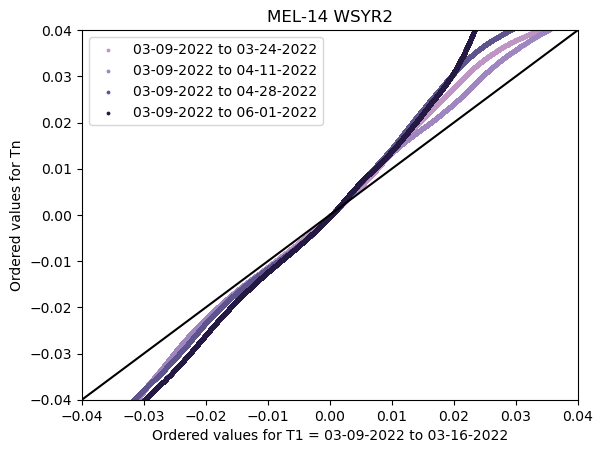

In [16]:
fig, ax = plt.subplots()

plt.scatter(ds_diff_m14_wsyr2_sfm_2.band1.sort_values(),
    ds_diff_m14_wsyr2_sfm_3.band1.sort_values(),s=3,color='#BE95C4',
    label='03-09-2022 to 03-24-2022')
plt.scatter(ds_diff_m14_wsyr2_sfm_2.band1.sort_values(),
    ds_diff_m14_wsyr2_sfm_4.band1.sort_values(),s=3,color='#9F86C0',
    label='03-09-2022 to 04-11-2022')
plt.scatter(ds_diff_m14_wsyr2_sfm_2.band1.sort_values(),
    ds_diff_m14_wsyr2_sfm_5.band1.sort_values(),s=3,color='#5E548E', 
    label='03-09-2022 to 04-28-2022')
plt.scatter(ds_diff_m14_wsyr2_sfm_2.band1.sort_values(),
    ds_diff_m14_wsyr2_sfm_6.band1.sort_values(),s=3,color='#231942',
    label='03-09-2022 to 06-01-2022')
sm.qqline(ax, '45', color ='k')
ax.set_xlabel('Ordered values for T1 = 03-09-2022 to 03-16-2022')
ax.set_ylabel('Ordered values for Tn')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(-0.04,0.04)
ax.legend()
ax.set_title('MEL-14 WSYR2')

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.ecdfplot(ds_diff_m14_wsyr2_sfm_2, x='band1', stat='percent', ax=ax, color='#CFA3C8', label='03-09-2022 to 03-16-2022')
sns.ecdfplot(ds_diff_m14_wsyr2_sfm_3, x='band1', stat='percent', ax=ax, color='#BE95C4', label='03-09-2022 to 03-24-2022')
sns.ecdfplot(ds_diff_m14_wsyr2_sfm_4, x='band1', stat='percent', ax=ax, color='#9F86C0', label='03-09-2022 to 04-11-2022')
sns.ecdfplot(ds_diff_m14_wsyr2_sfm_5, x='band1', stat='percent', ax=ax, color='#5E548E', label='03-09-2022 to 04-28-2022')
sns.ecdfplot(ds_diff_m14_wsyr2_sfm_6, x='band1', stat='percent', ax=ax, color='#231942', label='03-09-2022 to 06-01-2022')
ax.plot([0,0],[0,100], 'k--')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(0,100)
ax.set_xlabel(r'$\Delta$ Z (meters)')
ax.legend()
ax.set_title('MEL-14 WSYR2')

plt.show()